In [1]:
# univariate lstm example
from numpy import array
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense

import matplotlib.pyplot as plt

In [2]:
# OPEN WIND SPEED TIME SERIES
series_ws = pd.read_excel('wind_speed_main_db.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)


In [3]:
series_ws = series_ws.dropna()
series_ws = series_ws.resample('D').mean()

In [4]:
w_s_d = pd.DataFrame(series_ws)
input_ann = pd.concat([w_s_d.shift(3),w_s_d.shift(2),w_s_d.shift(1)], axis=1)
input_ann.columns = ['t-3','t-2', 't-1']
print(input_ann.head(5))

                 t-3       t-2       t-1
Data/Hora                               
2009-06-01       NaN       NaN       NaN
2009-06-02       NaN       NaN  6.831001
2009-06-03       NaN  6.831001  5.239543
2009-06-04  6.831001  5.239543  6.001895
2009-06-05  5.239543  6.001895  8.466946


In [ ]:
len(input_ann)

730

In [6]:
input_ann_t = input_ann.iloc[3:,:]
output_ann_t = w_s_d.iloc[3:,:]

"""
X_train, X_test, y_train, y_test = train_test_split(input_ann_t, output_ann_t, test_size=0.33, random_state=42)

"""
test_size = 548
X_train = input_ann_t[:-test_size]
X_test = input_ann_t[-test_size:]

y_train = output_ann_t[:-test_size]
y_test = output_ann_t[-test_size:]

In [7]:
# choose a number of time steps
n_steps = 3
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)
# demonstrate prediction
yhat = model.predict(X_test, verbose=0)


In [8]:
# MAE
def mean_absolute_error(true, pred):
    abs_error = np.abs(true - pred)
    sum_abs_error = np.sum(abs_error)
    mae_loss = sum_abs_error / true.size
    return mae_loss

#MAPE
def mean_absolute_percentage_error(true, pred):
    abs_error = (np.abs(true - pred)) / true
    sum_abs_error = np.sum(abs_error)
    mape_loss = (sum_abs_error / true.size) * 100
    return mape_loss

#MSE
def mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    mse_loss = sum_squared_error / true.size
    return mse_loss

#RMSE
def root_mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    rmse_loss = np.sqrt(sum_squared_error / true.size)
    return rmse_loss

#RRMSE
def relative_root_mean_squared_error(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss

In [9]:
# CHOOSING RRMSE METRIC AND VERIFY ITS PERFORMANCE
print("MAE: ", mean_absolute_error(yhat,y_test))
print("MAPE: ", mean_absolute_percentage_error(yhat,y_test))
print("MSE: ", mean_squared_error(yhat,y_test))
print("RMSE: ", root_mean_squared_error(yhat,y_test))
print("RRMSE: ", relative_root_mean_squared_error(yhat,y_test))

MAE:  Vmed(80m)    0.874421
dtype: float64
MAPE:  Vmed(80m)    10.725823
dtype: float64
MSE:  Vmed(80m)    1.275124
dtype: float64
RMSE:  Vmed(80m)    1.129214
dtype: float64
RRMSE:  Vmed(80m)    0.133303
dtype: float64


In [10]:
yhat_power = pd.DataFrame(yhat, columns=['Bidirectional'])
yhat_power.index = y_test.index

y_test.rename(columns = {'Vmed(80m)':'Teste'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


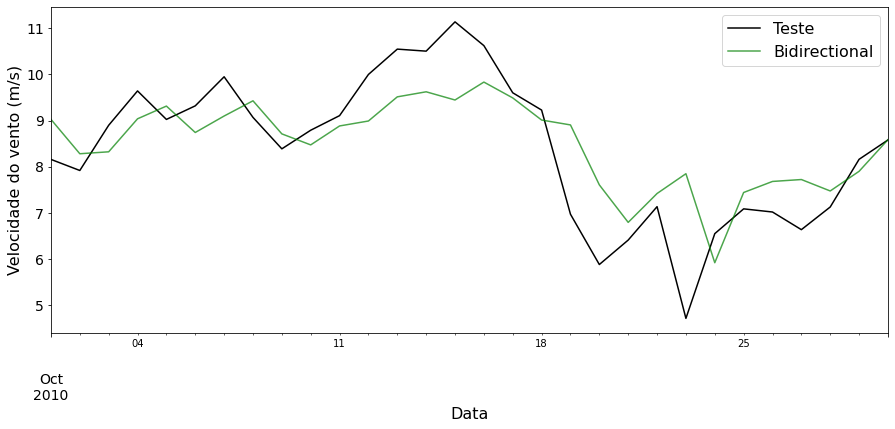

In [11]:
ax = y_test['2010-10-01':'2010-10-30'].plot(label='Test',color="black")
yhat_power['2010-10-01':'2010-10-30'].plot(figsize=(15, 6),ax=ax, label='Forecast', alpha=.7,color="green")
ax.set_xlabel('Data',fontsize=16)
plt.xticks(fontsize=14)
ax.set_ylabel("Velocidade do vento (m/s)", fontsize=16)
plt.yticks(fontsize=14)
plt.legend(prop={"size": 16})
plt.savefig('previsao_rede_neural_LSTM_Biderectional.png', format = 'png', dpi=1200)